In [309]:
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import datasets
from IPython.display import display, HTML

In [39]:
location = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/fundraising.csv"
df = pd.read_csv(location)
#df = pd.get_dummies(df, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','target_No Donor'], axis=1)
df.head()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,...,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,target
0,Yes,No,No,No,Yes,1,1,No,7,698,...,463,4,46,94.0,12.0,12.0,34,6,9.400000,Donor
1,No,No,No,Yes,No,2,5,Yes,8,828,...,376,13,32,30.0,10.0,5.0,29,7,4.285714,Donor
2,No,No,No,Yes,Yes,1,3,No,4,1471,...,546,4,94,177.0,10.0,8.0,30,3,7.080000,No Donor
3,No,Yes,No,No,Yes,1,4,No,8,547,...,432,7,20,23.0,11.0,11.0,30,6,7.666667,No Donor
4,No,Yes,No,No,Yes,1,4,Yes,8,482,...,275,28,38,73.0,10.0,10.0,31,3,7.300000,Donor


## You might think about how to estimate the out of sample error. Either partition the dataset into 80% training and 20% validation or use cross validation (set the seed to 12345).

In [28]:
np.random.seed(12345)
preds = "+".join(df.columns.drop("target_Donor"))
f = f' 	target_Donor ~ {preds}'
y, X = pt.dmatrices(f, df)
y = y[:, 0]
def confusion_table(confusion_mtx):
    """Renders a nice confusion table with labels"""
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
def prior_error_rate(confusion_matrix):
    """The prior probability that a result is positive"""
    return 1 - (np.sum(confusion_mtx[1, :]) / np.sum(confusion_mtx))

def total_error_rate(confusion_matrix):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)

def true_positive_rate(confusion_mtx):
    """or sensitivity: the proportion of actual POSITIVES that are correctly identified as such"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[1, :])

def false_negative_rate(confusion_mtx):
    """the proportion of actual POSITIVES that are incorrectly identified as negative"""
    return confusion_mtx[1, 0] / np.sum(confusion_mtx[1, :])

def false_positive_rate(confusion_mtx):
    """the proportion of actual NEGATIVES that are incorrectly identified as positives"""
    return confusion_mtx[0, 1] / np.sum(confusion_mtx[0, :])

def true_negative_rate(confusion_mtx):
    """or specificity: the proportion of actual NEGATIVES that are correctly identified as such"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[0, :])

def positive_predictive_value(confusion_mtx):
    """or precision: the proportion of predicted positives that are correctly predicted"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[:, 1])

def negative_predictive_value(confusion_mtx):
    """the proportion of predicted negatives that are correctly predicted"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[:, 0])

def classifier_stats(confusion_mtx):
    return pd.Series({'prior_error_rate': prior_error_rate(confusion_mtx),
                      'total_error_rate': total_error_rate(confusion_mtx),
                      'true_positive_rate (sensitivity)': true_positive_rate(confusion_mtx),
                      'false_negative_rate': false_negative_rate(confusion_mtx),
                      'false_positive_rate': false_positive_rate(confusion_mtx),
                      'true_negative_rate (specificity)': true_negative_rate(confusion_mtx),
                      'positive_predictive_value (precision)': positive_predictive_value(confusion_mtx),
                      'negative_predictive_value': negative_predictive_value(confusion_mtx)})
# PREDICT
for K in range(1, 21):
    # model
    model = KNeighborsClassifier(n_neighbors=K).fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    
    # Confusion table
    display(HTML('<h3>K={}</h3>'.format(K)))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    display(confusion_table(confusion_mtx))
    # Classifier stats
    display(classifier_stats(confusion_mtx))
#model_logit = sm.Logit(y_train, X_train).fit() <--- this technique didn't converge
logit       = LogisticRegression()
model_logit = logit.fit(X_train, y_train)
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
lda         = LinearDiscriminantAnalysis()
model_lda   = lda.fit(X_train, y_train)
# QDA
qda         = QuadraticDiscriminantAnalysis()
model_qda   = qda.fit(X_train, y_train)
# KNN_1
K = 1
model_knn_1 = KNeighborsClassifier(n_neighbors=K).fit(preprocessing.scale(X_train), y_train)
# KNN_3
K = 3
model_knn_3 = KNeighborsClassifier(n_neighbors=K).fit(preprocessing.scale(X_train), y_train)
# KNN_10
K = 10
model_knn_10 = KNeighborsClassifier(n_neighbors=K).fit(preprocessing.scale(X_train), y_train)
# QDA
qda         = QuadraticDiscriminantAnalysis()
model_qda   = qda.fit(X_train, y_train)
new_pred = model_qda.predict(new_data)
print("Predictions for future fundraising:")
print(new_pred)
models = {'logit': model_logit, 
          'lda': model_lda, 
          'qda': model_qda,
          'knn_1': model_knn_1,
         'knn_3': model_knn_3,
         'knn_10': model_knn_10}
scaled = ['knn_1', 'knn_3', 'knn_10']


# PREDICT
for k in models:
    # Predict
    if k in scaled:
        y_pred = models[k].predict(preprocessing.scale(X_test))
    else:
        y_pred = models[k].predict(X_test)
    # Confusion table
    display(HTML('<h3>{}</h3>'.format(k)))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    display(confusion_table(confusion_mtx))
    # Classifier stats
    display(classifier_stats(confusion_mtx)) 
    


,y_pred=0,y_pred=1,Total
,,,
y=0,147,156,303
y=1,152,145,297
Total,299,301,


prior_error_rate                         0.505000
total_error_rate                         0.513333
true_positive_rate (sensitivity)         0.488215
false_negative_rate                      0.511785
false_positive_rate                      0.514851
true_negative_rate (specificity)         0.485149
positive_predictive_value (precision)    0.481728
negative_predictive_value                0.491639
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,227,76,303
y=1,219,78,297
Total,446,154,


prior_error_rate                         0.505000
total_error_rate                         0.491667
true_positive_rate (sensitivity)         0.262626
false_negative_rate                      0.737374
false_positive_rate                      0.250825
true_negative_rate (specificity)         0.749175
positive_predictive_value (precision)    0.506494
negative_predictive_value                0.508969
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,143,160,303
y=1,149,148,297
Total,292,308,


prior_error_rate                         0.505000
total_error_rate                         0.515000
true_positive_rate (sensitivity)         0.498316
false_negative_rate                      0.501684
false_positive_rate                      0.528053
true_negative_rate (specificity)         0.471947
positive_predictive_value (precision)    0.480519
negative_predictive_value                0.489726
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,197,106,303
y=1,200,97,297
Total,397,203,


prior_error_rate                         0.505000
total_error_rate                         0.510000
true_positive_rate (sensitivity)         0.326599
false_negative_rate                      0.673401
false_positive_rate                      0.349835
true_negative_rate (specificity)         0.650165
positive_predictive_value (precision)    0.477833
negative_predictive_value                0.496222
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,141,162,303
y=1,152,145,297
Total,293,307,


prior_error_rate                         0.505000
total_error_rate                         0.523333
true_positive_rate (sensitivity)         0.488215
false_negative_rate                      0.511785
false_positive_rate                      0.534653
true_negative_rate (specificity)         0.465347
positive_predictive_value (precision)    0.472313
negative_predictive_value                0.481229
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,189,114,303
y=1,198,99,297
Total,387,213,


prior_error_rate                         0.505000
total_error_rate                         0.520000
true_positive_rate (sensitivity)         0.333333
false_negative_rate                      0.666667
false_positive_rate                      0.376238
true_negative_rate (specificity)         0.623762
positive_predictive_value (precision)    0.464789
negative_predictive_value                0.488372
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,147,156,303
y=1,138,159,297
Total,285,315,


prior_error_rate                         0.505000
total_error_rate                         0.490000
true_positive_rate (sensitivity)         0.535354
false_negative_rate                      0.464646
false_positive_rate                      0.514851
true_negative_rate (specificity)         0.485149
positive_predictive_value (precision)    0.504762
negative_predictive_value                0.515789
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,203,100,303
y=1,195,102,297
Total,398,202,


prior_error_rate                         0.505000
total_error_rate                         0.491667
true_positive_rate (sensitivity)         0.343434
false_negative_rate                      0.656566
false_positive_rate                      0.330033
true_negative_rate (specificity)         0.669967
positive_predictive_value (precision)    0.504950
negative_predictive_value                0.510050
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,158,145,303
y=1,157,140,297
Total,315,285,


prior_error_rate                         0.505000
total_error_rate                         0.503333
true_positive_rate (sensitivity)         0.471380
false_negative_rate                      0.528620
false_positive_rate                      0.478548
true_negative_rate (specificity)         0.521452
positive_predictive_value (precision)    0.491228
negative_predictive_value                0.501587
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,194,109,303
y=1,192,105,297
Total,386,214,


prior_error_rate                         0.505000
total_error_rate                         0.501667
true_positive_rate (sensitivity)         0.353535
false_negative_rate                      0.646465
false_positive_rate                      0.359736
true_negative_rate (specificity)         0.640264
positive_predictive_value (precision)    0.490654
negative_predictive_value                0.502591
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,158,145,303
y=1,153,144,297
Total,311,289,


prior_error_rate                         0.505000
total_error_rate                         0.496667
true_positive_rate (sensitivity)         0.484848
false_negative_rate                      0.515152
false_positive_rate                      0.478548
true_negative_rate (specificity)         0.521452
positive_predictive_value (precision)    0.498270
negative_predictive_value                0.508039
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,193,110,303
y=1,191,106,297
Total,384,216,


prior_error_rate                         0.505000
total_error_rate                         0.501667
true_positive_rate (sensitivity)         0.356902
false_negative_rate                      0.643098
false_positive_rate                      0.363036
true_negative_rate (specificity)         0.636964
positive_predictive_value (precision)    0.490741
negative_predictive_value                0.502604
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,158,145,303
y=1,154,143,297
Total,312,288,


prior_error_rate                         0.505000
total_error_rate                         0.498333
true_positive_rate (sensitivity)         0.481481
false_negative_rate                      0.518519
false_positive_rate                      0.478548
true_negative_rate (specificity)         0.521452
positive_predictive_value (precision)    0.496528
negative_predictive_value                0.506410
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,192,111,303
y=1,177,120,297
Total,369,231,


prior_error_rate                         0.505000
total_error_rate                         0.480000
true_positive_rate (sensitivity)         0.404040
false_negative_rate                      0.595960
false_positive_rate                      0.366337
true_negative_rate (specificity)         0.633663
positive_predictive_value (precision)    0.519481
negative_predictive_value                0.520325
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,166,137,303
y=1,151,146,297
Total,317,283,


prior_error_rate                         0.505000
total_error_rate                         0.480000
true_positive_rate (sensitivity)         0.491582
false_negative_rate                      0.508418
false_positive_rate                      0.452145
true_negative_rate (specificity)         0.547855
positive_predictive_value (precision)    0.515901
negative_predictive_value                0.523659
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,196,107,303
y=1,180,117,297
Total,376,224,


prior_error_rate                         0.505000
total_error_rate                         0.478333
true_positive_rate (sensitivity)         0.393939
false_negative_rate                      0.606061
false_positive_rate                      0.353135
true_negative_rate (specificity)         0.646865
positive_predictive_value (precision)    0.522321
negative_predictive_value                0.521277
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,166,137,303
y=1,158,139,297
Total,324,276,


prior_error_rate                         0.505000
total_error_rate                         0.491667
true_positive_rate (sensitivity)         0.468013
false_negative_rate                      0.531987
false_positive_rate                      0.452145
true_negative_rate (specificity)         0.547855
positive_predictive_value (precision)    0.503623
negative_predictive_value                0.512346
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,195,108,303
y=1,183,114,297
Total,378,222,


prior_error_rate                         0.505000
total_error_rate                         0.485000
true_positive_rate (sensitivity)         0.383838
false_negative_rate                      0.616162
false_positive_rate                      0.356436
true_negative_rate (specificity)         0.643564
positive_predictive_value (precision)    0.513514
negative_predictive_value                0.515873
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,165,138,303
y=1,156,141,297
Total,321,279,


prior_error_rate                         0.505000
total_error_rate                         0.490000
true_positive_rate (sensitivity)         0.474747
false_negative_rate                      0.525253
false_positive_rate                      0.455446
true_negative_rate (specificity)         0.544554
positive_predictive_value (precision)    0.505376
negative_predictive_value                0.514019
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,190,113,303
y=1,174,123,297
Total,364,236,


prior_error_rate                         0.505000
total_error_rate                         0.478333
true_positive_rate (sensitivity)         0.414141
false_negative_rate                      0.585859
false_positive_rate                      0.372937
true_negative_rate (specificity)         0.627063
positive_predictive_value (precision)    0.521186
negative_predictive_value                0.521978
dtype: float64

C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,y_pred=0,y_pred=1,Total
,,,
y=0,180,123,303
y=1,143,154,297
Total,323,277,


prior_error_rate                         0.505000
total_error_rate                         0.443333
true_positive_rate (sensitivity)         0.518519
false_negative_rate                      0.481481
false_positive_rate                      0.405941
true_negative_rate (specificity)         0.594059
positive_predictive_value (precision)    0.555957
negative_predictive_value                0.557276
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,155,148,303
y=1,128,169,297
Total,283,317,


prior_error_rate                         0.505000
total_error_rate                         0.460000
true_positive_rate (sensitivity)         0.569024
false_negative_rate                      0.430976
false_positive_rate                      0.488449
true_negative_rate (specificity)         0.511551
positive_predictive_value (precision)    0.533123
negative_predictive_value                0.547703
dtype: float64

C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


,y_pred=0,y_pred=1,Total
,,,
y=0,303,0,303
y=1,297,0,297
Total,600,0,


C:\Users\spt904\AppData\Local\Temp\ipykernel_6868\3037955282.py:41: RuntimeWarning: invalid value encountered in scalar divide
  return confusion_mtx[1, 1] / np.sum(confusion_mtx[:, 1])


prior_error_rate                         0.505
total_error_rate                         0.495
true_positive_rate (sensitivity)         0.000
false_negative_rate                      1.000
false_positive_rate                      0.000
true_negative_rate (specificity)         1.000
positive_predictive_value (precision)      NaN
negative_predictive_value                0.505
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,157,146,303
y=1,140,157,297
Total,297,303,


prior_error_rate                         0.505000
total_error_rate                         0.476667
true_positive_rate (sensitivity)         0.528620
false_negative_rate                      0.471380
false_positive_rate                      0.481848
true_negative_rate (specificity)         0.518152
positive_predictive_value (precision)    0.518152
negative_predictive_value                0.528620
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,144,159,303
y=1,137,160,297
Total,281,319,


prior_error_rate                         0.505000
total_error_rate                         0.493333
true_positive_rate (sensitivity)         0.538721
false_negative_rate                      0.461279
false_positive_rate                      0.524752
true_negative_rate (specificity)         0.475248
positive_predictive_value (precision)    0.501567
negative_predictive_value                0.512456
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,180,123,303
y=1,164,133,297
Total,344,256,


prior_error_rate                         0.505000
total_error_rate                         0.478333
true_positive_rate (sensitivity)         0.447811
false_negative_rate                      0.552189
false_positive_rate                      0.405941
true_negative_rate (specificity)         0.594059
positive_predictive_value (precision)    0.519531
negative_predictive_value                0.523256
dtype: float64

In [24]:
pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['PredDonor', 'PredNoDonor'],index=['Donor','NoDonor'])

,PredDonor,PredNoDonor
Donor,190,113
NoDonor,174,123


In [29]:
# MODELS
# Logistic Regression
#model_logit = sm.Logit(y_train, X_train).fit() <--- this technique didn't converge
logit       = LogisticRegression()
model_logit = logit.fit(X_train, y_train)
# LDA
lda         = LinearDiscriminantAnalysis()
model_lda   = lda.fit(X_train, y_train)


models = {'logit': model_logit, 
          'lda': model_lda, 
          'qda': model_qda}
scaled = []


# PREDICT
for k in models:
    # Predict
    if k in scaled:
        y_pred = models[k].predict(preprocessing.scale(X_test))
    else:
        y_pred = models[k].predict(X_test)
    # Confusion table
    display(HTML('<h3>{}</h3>'.format(k)))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    display(confusion_table(confusion_mtx))
    # Classifier stats
    display(classifier_stats(confusion_mtx))

C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,y_pred=0,y_pred=1,Total
,,,
y=0,180,123,303
y=1,143,154,297
Total,323,277,


prior_error_rate                         0.505000
total_error_rate                         0.443333
true_positive_rate (sensitivity)         0.518519
false_negative_rate                      0.481481
false_positive_rate                      0.405941
true_negative_rate (specificity)         0.594059
positive_predictive_value (precision)    0.555957
negative_predictive_value                0.557276
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,155,148,303
y=1,128,169,297
Total,283,317,


prior_error_rate                         0.505000
total_error_rate                         0.460000
true_positive_rate (sensitivity)         0.569024
false_negative_rate                      0.430976
false_positive_rate                      0.488449
true_negative_rate (specificity)         0.511551
positive_predictive_value (precision)    0.533123
negative_predictive_value                0.547703
dtype: float64

C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


,y_pred=0,y_pred=1,Total
,,,
y=0,303,0,303
y=1,297,0,297
Total,600,0,


C:\Users\spt904\AppData\Local\Temp\ipykernel_6868\3037955282.py:41: RuntimeWarning: invalid value encountered in scalar divide
  return confusion_mtx[1, 1] / np.sum(confusion_mtx[:, 1])


prior_error_rate                         0.505
total_error_rate                         0.495
true_positive_rate (sensitivity)         0.000
false_negative_rate                      1.000
false_positive_rate                      0.000
true_negative_rate (specificity)         1.000
positive_predictive_value (precision)      NaN
negative_predictive_value                0.505
dtype: float64

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 600 points : 286


,num_child,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,zipconvert2_Yes,zipconvert3_Yes,zipconvert4_Yes,zipconvert5_Yes,homeowner_Yes,female_Yes
0,1,5,9,1399,637,703,1,74,102.0,6.0,5.0,29,3,4.857143,0.0,1.0,0.0,0.0,1.0,1.0
1,1,1,7,1355,411,497,9,77,249.0,15.0,7.0,35,3,9.576923,1.0,0.0,0.0,0.0,1.0,0.0
2,1,4,1,835,310,364,22,70,126.0,6.0,6.0,34,8,4.344828,0.0,0.0,0.0,1.0,1.0,1.0
3,1,4,8,1019,389,473,15,21,26.0,16.0,16.0,37,5,13.000000,0.0,0.0,1.0,0.0,1.0,0.0
4,1,2,7,992,524,563,6,63,100.0,20.0,3.0,21,6,7.692308,0.0,1.0,0.0,0.0,1.0,1.0


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
np.random.seed(12345)
X = data.drop(columns=['target_Donor'])
y = data['target_Donor']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train.head()
y_train.head()
# Initialize Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Now let's make predictions on new data
# Load the new data
new_data_url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/future_fundraising.csv"
new_data = pd.read_csv(new_data_url)
new_data = pd.get_dummies(new_data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No'], axis=1)

# Make predictions on the new data
new_predictions = clf.predict(new_data)
print("Predictions for future fundraising:")
print(new_predictions)


Accuracy: 0.5233333333333333
Predictions for future fundraising:
[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]


In [71]:
lda         = LinearDiscriminantAnalysis()
model_lda   = lda.fit(X_train, y_train)
new_pred = model_lda.predict(new_data)
print("Predictions for future fundraising:")
print(new_pred)

Predictions for future fundraising:
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.]


In [66]:
import csv

# Array of data
data = [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
        1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
        0., 0., 1., 1., 1.]

# Write to CSV file
with open('predictionslda.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["prediction"])
    for value in data:
        writer.writerow([value])


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import datasets
from IPython.display import display, HTML

In [93]:
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from sklearn.decomposition import PCA

In [154]:
# Load the training data
url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/fundraising.csv"
data = pd.read_csv(url)

# Split the data into features and target variable
data= pd.get_dummies(data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','target_No Donor'], axis=1)
data.head()

,num_child,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,...,months_since_donate,time_lag,avg_gift,zipconvert2_Yes,zipconvert3_Yes,zipconvert4_Yes,zipconvert5_Yes,homeowner_Yes,female_Yes,target_Donor
0,1,1,7,698,422,463,4,46,94.0,12.0,...,34,6,9.400000,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,5,8,828,358,376,13,32,30.0,10.0,...,29,7,4.285714,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1,3,4,1471,484,546,4,94,177.0,10.0,...,30,3,7.080000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,4,8,547,386,432,7,20,23.0,11.0,...,30,6,7.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,4,8,482,242,275,28,38,73.0,10.0,...,31,3,7.300000,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [155]:
data.columns

Index(['num_child', 'income', 'wealth', 'home_value', 'med_fam_inc',
       'avg_fam_inc', 'pct_lt15k', 'num_prom', 'lifetime_gifts',
       'largest_gift', 'last_gift', 'months_since_donate', 'time_lag',
       'avg_gift', 'zipconvert2_Yes', 'zipconvert3_Yes', 'zipconvert4_Yes',
       'zipconvert5_Yes', 'homeowner_Yes', 'female_Yes', 'target_Donor'],
      dtype='object')

In [118]:
# Now let's make predictions on new data
# Load the new data
new_data_url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/future_fundraising.csv"
new_data = pd.read_csv(new_data_url)
new_data = pd.get_dummies(new_data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No'], axis=1)
predf = pca.transform(new_data)
# Make predictions on the new data
new_predictions = clf.predict(predf)
print("Predictions for future fundraising:")
print(new_predictions)


Predictions for future fundraising:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [119]:
import csv

# Array of data
data = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]

# Write to CSV file
with open('pcaandlogit.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["prediction"])
    for value in data:
        writer.writerow([value])


[  351  2630  2586  4125  4545  4597 -3564  -973  -329   596  1540   490
    53  1631  -589 -1163  -759  2059  1192  -334]


In [228]:
# Load the training data
url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/fundraising.csv"
data = pd.read_csv(url)

# Split the data into features and target variable
data= pd.get_dummies(data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','target_No Donor'], axis=1)
data.head()

,num_child,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,...,months_since_donate,time_lag,avg_gift,zipconvert2_Yes,zipconvert3_Yes,zipconvert4_Yes,zipconvert5_Yes,homeowner_Yes,female_Yes,target_Donor
0,1,1,7,698,422,463,4,46,94.0,12.0,...,34,6,9.400000,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,5,8,828,358,376,13,32,30.0,10.0,...,29,7,4.285714,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1,3,4,1471,484,546,4,94,177.0,10.0,...,30,3,7.080000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,4,8,547,386,432,7,20,23.0,11.0,...,30,6,7.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,4,8,482,242,275,28,38,73.0,10.0,...,31,3,7.300000,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [178]:
from sklearn.preprocessing import StandardScaler


np.random.seed(12345)
X = data.drop(columns=['target_Donor'])
y = data['target_Donor']
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train.head()


,num_child,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,zipconvert2_Yes,zipconvert3_Yes,zipconvert4_Yes,zipconvert5_Yes,homeowner_Yes,female_Yes
1890,1,4,8,1041,247,310,24,32,56.0,15.0,15.0,28,5,9.333333,0.0,0.0,0.0,1.0,1.0,1.0
604,1,7,8,1658,463,597,13,30,57.0,13.0,11.0,35,2,11.400000,1.0,0.0,0.0,0.0,1.0,1.0
1627,1,3,8,2732,572,618,12,24,33.0,10.0,6.0,28,2,6.600000,0.0,0.0,0.0,1.0,1.0,0.0
1894,1,3,8,357,181,178,48,12,20.0,20.0,20.0,31,5,20.000000,1.0,0.0,0.0,0.0,0.0,1.0
473,4,5,8,1050,538,618,2,21,30.0,20.0,20.0,34,2,15.000000,0.0,0.0,1.0,0.0,1.0,0.0


In [179]:
# Fit on training set only.
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [180]:
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

from sklearn.naive_bayes import GaussianNB
# Initialize Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.505


In [132]:
# Array of data
data = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['prediction'])

# Save to CSV file
df.to_csv('pcaandbayes.csv', index=False)

In [176]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)

train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')
clf=logisticRegr.fit(train_img, y_train)
#print(logit)
pca.n_components_
clf.score(test_img, y_test)



0.48833333333333334

[    -3    526    703 981527 135842 134515  -5183  -1523  -4533   1214
   1689     50     30   1274    -54    -92    -81    227     53    -13]
Accuracy: 0.48


In [182]:
import csv

# Array of data
data = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0.]

# Write to CSV file
with open('scalebayes.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["value"])
    writer.writerows([[value] for value in data])


In [181]:
# Now let's make predictions on new data
# Load the new data
new_data_url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/future_fundraising.csv"
new_data = pd.read_csv(new_data_url)
new_data = pd.get_dummies(new_data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No'], axis=1)
predf = pca.transform(new_data)
# Make predictions on the new data
new_predictions = clf.predict(predf)
print("Predictions for future fundraising:")
print(new_predictions)

Predictions for future fundraising:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [ ]:
f = 'num_child', 'income', 'wealth', 'home_value', 'med_fam_inc',
       'avg_fam_inc', 'pct_lt15k', 'num_prom', 'lifetime_gifts',
       'largest_gift', 'last_gift', 'months_since_donate', 'time_lag',
       'avg_gift', 'zipconvert2_Yes', 'zipconvert3_Yes', 'zipconvert4_Yes',
       'zipconvert5_Yes', 'homeowner_Yes', 'female_Yes'
y, X = pt.dmatrices(f, data)

# Scale data
X = preprocessing.scale(X)
y = np.ravel(y)


costs = np.logspace(-5, 2, 20)
scores = []
for i in costs:
    # Get cv score 
    model = svm.SVC(kernel='linear', C=i, random_state=0)
    score = np.mean(cross_val_score(model, preprocessing.scale(X), y, cv=5))
    scores += [[i, score]]
    #print(f'progress: {list(costs).index(i)} of {len(costs)}')

columns=['Cost', 'CV_accuracy']
results_df = pd.DataFrame(data=np.asarray(scores), columns=columns)

display(results_df)

In [226]:
import pylab as pl
from sklearn.preprocessing import StandardScaler
# normalize data
from sklearn import preprocessing
#df= data['target_Donor']

data_scaled = pd.DataFrame(preprocessing.scale(new_data),columns = new_data.columns) 

np.random.seed(12345)
X = data_scaled#.drop(columns=['target_Donor'])
#y = df
# Split data into training and testing sets (80% training, 20% testing)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X.head()

,num_child,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,zipconvert2_Yes,zipconvert3_Yes,zipconvert4_Yes,zipconvert5_Yes,homeowner_Yes,female_Yes
0,-0.165521,0.796851,1.031757,0.383839,1.704148,1.851774,-1.195184,1.241872,0.001476,-0.840061,-0.737191,-0.449987,-0.794822,-0.879250,-0.460566,1.855921,-0.525924,-0.788430,0.564519,0.845154
1,-0.165521,-1.787532,0.183738,0.328518,0.177390,0.471986,-0.487800,1.384343,1.868670,-0.139345,-0.582333,0.754439,-0.794822,-0.228595,2.171241,-0.538816,-0.525924,-0.788430,0.564519,-1.183216
2,-0.165521,0.150756,-2.360321,-0.325270,-0.504922,-0.418848,0.661699,1.051910,0.306324,-0.840061,-0.659762,0.553701,0.337941,-0.949877,-0.460566,-0.538816,-0.525924,1.268344,0.564519,0.845154
3,-0.165521,0.150756,0.607747,-0.093930,0.028767,0.311234,0.042738,-1.275115,-0.963877,-0.061488,0.114531,1.155914,-0.341717,0.243300,-0.460566,-0.538816,1.901416,-0.788430,0.564519,-1.183216
4,-0.165521,-1.141436,0.183738,-0.127876,0.940769,0.914054,-0.753069,0.719478,-0.023928,0.249942,-0.892050,-2.055888,-0.115164,-0.488403,-0.460566,1.855921,-0.525924,-0.788430,0.564519,0.845154


In [227]:
pca = PCA(n_components=2)
pca.fit_transform(data_scaled)
#'income',    'wealth',  'home_value',  'med_fam_inc',  'avg_fam_inc',  'pct_lt15k' ,'avg_gift', 'zipconvert3_Yes' 
'largest_gift',  'last_gift', 'time_lag',  'avg_gift', 'zipconvert3_Yes',  'zipconvert4_Yes', 'female_Yes'
# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2']))

      num_child    income    wealth  home_value  med_fam_inc  avg_fam_inc  \
PC-1   0.112175  0.311126  0.234609    0.344672     0.452665     0.449582   
PC-2  -0.037192  0.051519 -0.002200   -0.046541    -0.047022    -0.029169   

      pct_lt15k  num_prom  lifetime_gifts  largest_gift  last_gift  \
PC-1  -0.391167 -0.183086       -0.192051      0.038583   0.064646   
PC-2   0.031457 -0.029941        0.254742      0.559263   0.550435   

      months_since_donate  time_lag  avg_gift  zipconvert2_Yes  \
PC-1             0.155932 -0.024052  0.089585        -0.139512   
PC-2             0.048109 -0.001979  0.522187         0.138899   

      zipconvert3_Yes  zipconvert4_Yes  zipconvert5_Yes  homeowner_Yes  \
PC-1        -0.032505         0.018142         0.121575       0.105074   
PC-2        -0.039517        -0.037932        -0.042469       0.083738   

      female_Yes  
PC-1   -0.032781  
PC-2    0.045712  


In [209]:
np.random.seed(12345)
X = data_scaled.drop(columns=['target_Donor','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift'])
y = df
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train.head()
y_train.head()

1890    0.0
604     1.0
1627    1.0
1894    1.0
473     1.0
Name: target_Donor, dtype: float64

In [225]:
# Now let's make predictions on new data
# Load the new data
new_data_url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/future_fundraising.csv"
new_data = pd.read_csv(new_data_url)
#,'female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift'
new_data = pd.get_dummies(new_data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No'], axis=1)


In [217]:

# Now let's make predictions on new data
# Load the new data
new_data_url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/future_fundraising.csv"
new_data = pd.read_csv(new_data_url)
new_data = pd.get_dummies(new_data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift'], axis=1)
# Make predictions on the new data
new_predictions = clf.predict(new_data)
print("Predictions for future fundraising:")
print(new_predictions)

Predictions for future fundraising:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Accuracy: 0.52
Predictions for future fundraising:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [230]:
import pylab as pl
from sklearn.preprocessing import StandardScaler
# normalize data
from sklearn import preprocessing
df= data['target_Donor']

data_scaled = pd.DataFrame(preprocessing.scale(data),columns = data.columns) 

np.random.seed(12345)
X = data_scaled.drop(columns=['target_Donor','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift'])
y = df
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train.head()

,num_child,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,last_gift,avg_gift,zipconvert3_Yes,zipconvert5_Yes,homeowner_Yes
1890,-0.200825,0.061617,0.630058,-0.107426,-0.813778,-0.724264,0.767258,0.144841,-0.179290,-0.474331,1.264774,0.545507
604,-0.200825,1.891839,0.630058,0.540692,0.429718,0.975215,-0.141261,-0.237074,0.098137,-0.474331,-0.790655,0.545507
1627,-0.200825,-0.548456,0.630058,1.668859,1.057223,1.099567,-0.223854,-0.714468,-0.546209,-0.474331,1.264774,0.545507
1894,-0.200825,-0.548456,0.630058,-0.825923,-1.193735,-1.505906,2.749481,0.622235,1.252590,-0.474331,-0.790655,-1.833157
473,8.488701,0.671691,0.630058,-0.097972,0.861487,1.099567,-1.049780,0.622235,0.581396,-0.474331,-0.790655,0.545507


In [277]:

logisticRegr = LogisticRegression(solver = 'lbfgs')
clf=logisticRegr.fit(X_train, y_train)
#print(logit)
pca.n_components_
clf.score(X_test, y_test)
new_predictions = clf.predict(new_data)
print("Predictions for future fundraising:")
print(new_predictions)

Predictions for future fundraising:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [279]:

clf2 = GaussianNB()

# Train the classifier
clf2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf2.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
new_predictions = clf2.predict(new_data)
print("Predictions for future fundraising:")
print(new_predictions)

Accuracy: 0.5333333333333333
Predictions for future fundraising:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [256]:

# Load the training data
url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/fundraising.csv"
data = pd.read_csv(url)

# Split the data into features and target variable
data= pd.get_dummies(data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','target_No Donor'], axis=1)
data.head()


# Load the training data
#url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/fundraising.csv"
#data = pd.read_csv(url)
#data.replace(to_replace=['no', 'yes'], value=[0, 1])

,num_child,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,...,months_since_donate,time_lag,avg_gift,zipconvert2_Yes,zipconvert3_Yes,zipconvert4_Yes,zipconvert5_Yes,homeowner_Yes,female_Yes,target_Donor
0,1,1,7,698,422,463,4,46,94.0,12.0,...,34,6,9.400000,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,5,8,828,358,376,13,32,30.0,10.0,...,29,7,4.285714,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1,3,4,1471,484,546,4,94,177.0,10.0,...,30,3,7.080000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,4,8,547,386,432,7,20,23.0,11.0,...,30,6,7.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,4,8,482,242,275,28,38,73.0,10.0,...,31,3,7.300000,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [286]:




# Now let's make predictions on new data
# Load the new data
new_data_url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/future_fundraising.csv"
new_data = pd.read_csv(new_data_url)
new_data = pd.get_dummies(new_data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift','num_child'], axis=1)





In [236]:
import csv

# Array of data
data = [1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 0.]

# Replace 1 with "Donor" and 0 with "No Donor"
data_replaced = ["Donor" if x == 1 else "No Donor" for x in data]

# Write to CSV file
with open('ldapca.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["value"])
    writer.writerows([[value] for value in data_replaced])


In [249]:
df= data['target_Donor']

data_scaled = pd.DataFrame(preprocessing.scale(data),columns = data.columns) 

np.random.seed(12345)
X = data_scaled.drop(columns=['target_Donor','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift'])
y = df
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train.head()

,num_child,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,last_gift,avg_gift,zipconvert3_Yes,zipconvert5_Yes,homeowner_Yes
1890,-0.200825,0.061617,0.630058,-0.107426,-0.813778,-0.724264,0.767258,0.144841,-0.179290,-0.474331,1.264774,0.545507
604,-0.200825,1.891839,0.630058,0.540692,0.429718,0.975215,-0.141261,-0.237074,0.098137,-0.474331,-0.790655,0.545507
1627,-0.200825,-0.548456,0.630058,1.668859,1.057223,1.099567,-0.223854,-0.714468,-0.546209,-0.474331,1.264774,0.545507
1894,-0.200825,-0.548456,0.630058,-0.825923,-1.193735,-1.505906,2.749481,0.622235,1.252590,-0.474331,-0.790655,-1.833157
473,8.488701,0.671691,0.630058,-0.097972,0.861487,1.099567,-1.049780,0.622235,0.581396,-0.474331,-0.790655,0.545507


In [287]:
# QDA
qda         = QuadraticDiscriminantAnalysis()
model_qda   = qda.fit(X_train, y_train)
new_pred = model_qda.predict(new_data)
print("Predictions for future fundraising:")
print(new_pred)

Predictions for future fundraising:
[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.]


In [284]:
import pylab as pl
from sklearn.preprocessing import StandardScaler
# normalize data
from sklearn import preprocessing
# Load the training data
url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/fundraising.csv"
data = pd.read_csv(url)

# Split the data into features and target variable
data= pd.get_dummies(data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No','target_No Donor'], axis=1)
data.head()
df= data['target_Donor']

data_scaled = pd.DataFrame(preprocessing.scale(data),columns = data.columns) 

np.random.seed(12345)
X = data_scaled.drop(columns=['target_Donor','female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift'])
#y = df
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train.head()


pca = PCA(n_components=2)
pca.fit_transform(X)
#'income',    'wealth',  'home_value',  'med_fam_inc',  'avg_fam_inc',  'pct_lt15k' ,'avg_gift', 'zipconvert3_Yes' 
#'largest_gift',  'last_gift', 'time_lag',  'avg_gift', 'zipconvert3_Yes',  'zipconvert4_Yes', 'female_Yes'
# Dump components relations with features:
#print(pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2']))

X2 = X.drop(columns=['num_child',    'income',    'wealth',  'home_value', 'zipconvert3_Yes',  'zipconvert5_Yes', 'homeowner_Yes'])
X3 = X.drop(columns=['num_child'])
#y = df
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=12345)
X_train.head()

















,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,last_gift,avg_gift,zipconvert3_Yes,zipconvert5_Yes,homeowner_Yes
1890,0.061617,0.630058,-0.107426,-0.813778,-0.724264,0.767258,0.144841,-0.179290,-0.474331,1.264774,0.545507
604,1.891839,0.630058,0.540692,0.429718,0.975215,-0.141261,-0.237074,0.098137,-0.474331,-0.790655,0.545507
1627,-0.548456,0.630058,1.668859,1.057223,1.099567,-0.223854,-0.714468,-0.546209,-0.474331,1.264774,0.545507
1894,-0.548456,0.630058,-0.825923,-1.193735,-1.505906,2.749481,0.622235,1.252590,-0.474331,-0.790655,-1.833157
473,0.671691,0.630058,-0.097972,0.861487,1.099567,-1.049780,0.622235,0.581396,-0.474331,-0.790655,0.545507


In [288]:
lda         = LinearDiscriminantAnalysis()
model_lda   = lda.fit(X_train, y_train)
new_pred = model_lda.predict(new_data)
print("Predictions for future fundraising:")
print(new_pred)

Predictions for future fundraising:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]


In [283]:
import csv

# Array of data
data = [0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
        1., 0., 0., 1., 0.]

# Replace 1 with "Donor" and 0 with "No Donor"
data_replaced = ["Donor" if x == 1 else "No Donor" for x in data]

# Write to CSV file
with open('pcapca2qda.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["value"])
    writer.writerows([[value] for value in data_replaced])



In [292]:

# Now let's make predictions on new data
# Load the new data
new_data_url = "https://raw.githubusercontent.com/shadowcrow0/modeling/main/future_fundraising.csv"
new_data = pd.read_csv(new_data_url)
new_data = pd.get_dummies(new_data, dtype=np.float64).drop(['zipconvert4_No', 'zipconvert3_No', 'zipconvert2_No', 'zipconvert5_No','homeowner_No','female_No'], axis=1)#,'female_Yes','zipconvert4_Yes','zipconvert2_Yes','months_since_donate','time_lag','num_prom',  'lifetime_gifts' , 'largest_gift','num_child'])
new_data.head()




,num_child,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,zipconvert2_Yes,zipconvert3_Yes,zipconvert4_Yes,zipconvert5_Yes,homeowner_Yes,female_Yes
0,1,5,9,1399,637,703,1,74,102.0,6.0,5.0,29,3,4.857143,0.0,1.0,0.0,0.0,1.0,1.0
1,1,1,7,1355,411,497,9,77,249.0,15.0,7.0,35,3,9.576923,1.0,0.0,0.0,0.0,1.0,0.0
2,1,4,1,835,310,364,22,70,126.0,6.0,6.0,34,8,4.344828,0.0,0.0,0.0,1.0,1.0,1.0
3,1,4,8,1019,389,473,15,21,26.0,16.0,16.0,37,5,13.000000,0.0,0.0,1.0,0.0,1.0,0.0
4,1,2,7,992,524,563,6,63,100.0,20.0,3.0,21,6,7.692308,0.0,1.0,0.0,0.0,1.0,1.0


In [299]:
np.random.seed(12345);
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(new_data)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [310]:
from ISLP.cluster import compute_linkage
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs);

ModuleNotFoundError: No module named 'ISLP'

TypeError: Axes.scatter() missing 1 required positional argument: 'y'

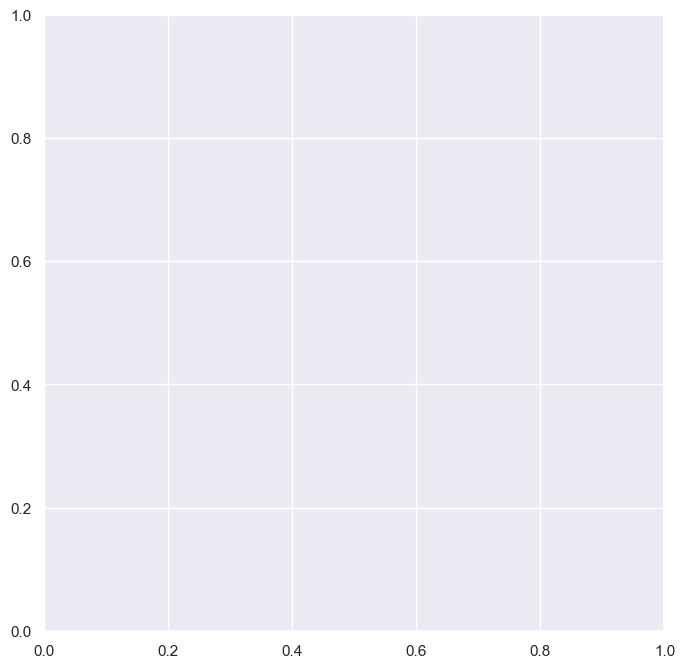

In [298]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(new_data, c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");